### Data Preproscessing

1) importing the libraries 

2)importing the dataset  

3)dealing with missing data  

4)Encoding categorical variables 

5) Splitting the dataset into train  and test sets 

6) Feature scalling

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset = pd.read_csv("breast cancer kaggle.csv")
dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
dataset.shape

(569, 33)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
dataset["Unnamed: 32"].sample(10)

235   NaN
141   NaN
364   NaN
269   NaN
171   NaN
527   NaN
564   NaN
234   NaN
233   NaN
117   NaN
Name: Unnamed: 32, dtype: float64

In [6]:
dataset=dataset.drop(columns="Unnamed: 32")

In [7]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Lets deal with missing data

In [9]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Encoding the categorical data

In [10]:
#there is only one column who has object data type

dataset.select_dtypes(include="object").columns

Index(['diagnosis'], dtype='object')

In [11]:
dataset["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [12]:
dataset.shape

(569, 32)

In [13]:
dataset=pd.get_dummies(data=dataset,drop_first=True)

In [14]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [15]:
dataset.shape

(569, 32)

### Count plot
lets see what is the difference of M and B

C:\Users\no name\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

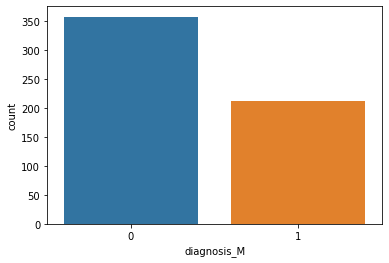

In [16]:
sns.countplot(dataset["diagnosis_M"],label="Count")
plt.show

In [17]:
(dataset.diagnosis_M==0).sum()

357

In [18]:
(dataset.diagnosis_M==1).sum()

212

### Corelation matrix and heatmap 

In [19]:
dataset_2 = dataset.drop(columns="diagnosis_M")

<AxesSubplot:title={'center':'correlation with diagnosis_M'}>

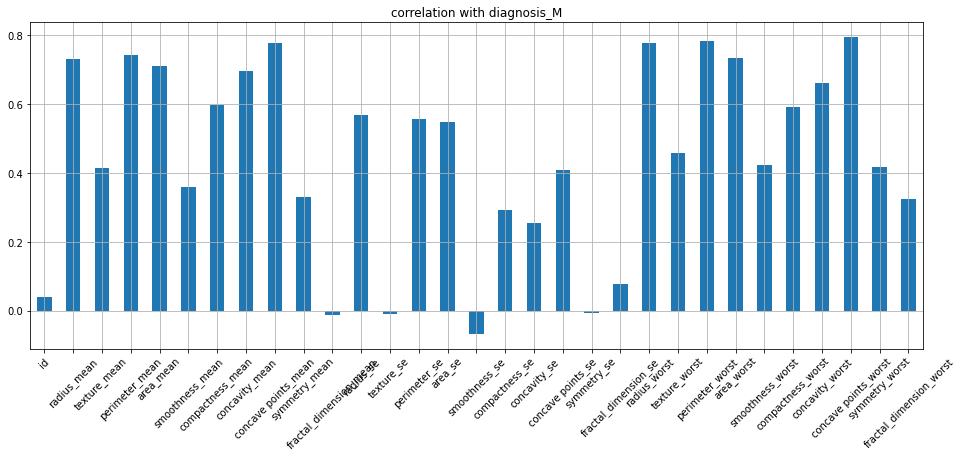

In [20]:
dataset_2.corrwith(dataset["diagnosis_M"]).plot.bar(
    figsize=(16,6),title="correlation with diagnosis_M",
    rot=45 , grid=True
)

In [21]:
corr=dataset.corr()

<AxesSubplot:>

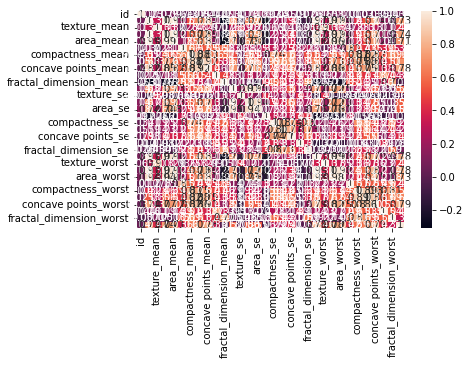

In [22]:
plt.Figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

### Splitting the dataset into train and test set

In [23]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [24]:
#independent variables
# also not including ID column
x=dataset.iloc[:, 1:-1].values

In [25]:
x.shape

(569, 30)

In [26]:
# dependent variable 
y=dataset.iloc[:,-1].values
y.shape

(569,)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2 , random_state=0)

In [28]:
x_train.shape


(455, 30)

In [29]:
x_test.shape

(114, 30)

In [30]:
y_train.shape

(455,)

In [31]:
y_test.shape

(114,)

### feature Scalling

In [32]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [33]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [34]:
x_test

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

### data preprocessing is complete now Building the model

### 1) Logistic regression 

In [35]:
from sklearn.linear_model import LogisticRegression
classifier_lr=LogisticRegression(random_state=0)
classifier_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [36]:
y_pred = classifier_lr.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix , f1_score ,precision_score , recall_score

In [38]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)


results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [39]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[65  2]
 [ 3 44]]


In [40]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.95614,0.946237,0.956522,0.93617


### Cross validation 

In [41]:
from sklearn.model_selection import cross_val_score
accuracies =cross_val_score(estimator=classifier_lr,X=x_train,y=y_train,cv=10)

print("Accuracy is {:.2f} %" .format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 97.81 %
Standard Deviation is 1.98 %


### Random Forest 

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [43]:
y_pred=classifier_rf.predict(x_test)

acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results=results.append(model_results,ignore_index=True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.956140,0.946237,0.956522,0.936170
1,Random Forest,0.973684,0.967742,0.978261,0.957447


In [44]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[66  1]
 [ 2 45]]


cross validation of random forest

In [45]:
accuracies=cross_val_score(estimator=classifier_rf,X=x_train,y=y_train,cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation {:.2f} %".format(accuracies.std()*100))

Accuracy is 96.05 %
Standard deviation 3.07 %
